In [1]:
cd /content/drive/My Drive/Projects/Level sets/src

/content/drive/My Drive/Projects/Level sets/src


In [0]:
import cv2
import numpy as np
import scipy.io
import scipy.ndimage as nd

from skimage.draw import random_shapes
import matplotlib.pyplot as plt

In [0]:
def bwdist(mask):
  return nd.distance_transform_edt(mask == 0)

def grad(x):
    return np.array(np.gradient(x))

def mask2levelSet(mask):
    return bwdist(mask) - bwdist(1 - mask)

def norm(x, axis=0):
    return np.sqrt(np.sum(np.square(x), axis=axis))

In [0]:
image = cv2.imread("../data/images/4.jpg")

mask = scipy.io.loadmat('../data/groundTruth/4.mat')['groundTruth'][0][0][0][0][0] -1.0

while(True):
  init, _ = random_shapes((256, 256), max_shapes=1, shape=None, multichannel=False)
  init = np.where(init == 255, 0, 1)
  if(np.sum(init*mask) > 0):
    break

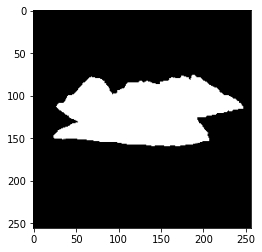

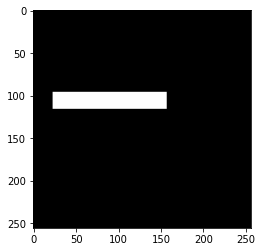

In [11]:
plt.imshow(mask, cmap='gray')
plt.show()

plt.imshow(init, cmap='gray')
plt.show()

In [0]:
phi_i = mask2levelSet(init)
phi_i = np.where(phi_i == 1, 0, phi_i)#make boundary 0

phi_gt = mask2levelSet(mask)
phi_gt = np.where(phi_gt == 1, 0, phi_gt)#make boundary 0

for i in range(100):
  dphi = grad(phi_i)
  dphi_norm = norm(dphi)

  F = phi_gt - phi_i 
  F = F / np.abs(np.where(F == 0, 1, F)) #prevent division by 0 

  dphi_t = F * dphi_norm
  phi_i = phi_i + dphi_t

  plt.contour(phi_i, cmap='gray')
  plt.title(str(i))
  plt.show()  



plt.contour(phi_gt, cmap='gray')
plt.show()

Output hidden; open in https://colab.research.google.com to view.